<a href="https://colab.research.google.com/github/IgorBeHolder/Netlogy/blob/main/Netology_math_LA_Advanced_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Продвинутая оптимизация

### Задание тестовой функции Розенброка

Необходимые библиотеки

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Определение функции

In [2]:
def rosenbrock(x):
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0)

Визуализация

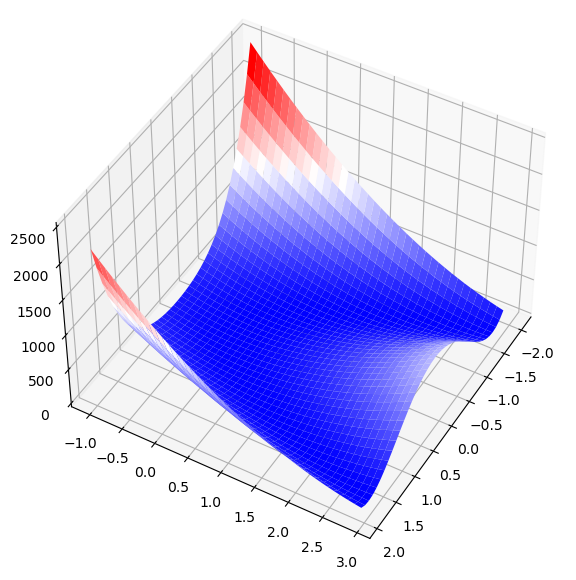

In [3]:
fig = plt.figure(figsize=[10, 7])
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 30)

X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock(np.array([X,Y]))

surf = ax.plot_surface(X, Y, Z, cmap='bwr')
plt.show()

### Методы нулевого порядка (прямыe методы)

Воспользуемся методом <b>Нелдера-Мида</b> из билиотеки scipy

In [4]:
from scipy.optimize import minimize

Выберем случайную начальную точку $X_0$

In [5]:
# x0=np.array([1.2,0.7,2.1])
x0 = np.random.rand(1,3).ravel() * 5
x0

array([4.52187855, 1.79880459, 3.92418001])

Используем функцию `minimize`

In [6]:
res = minimize(rosenbrock, x0, method='nelder-mead',options={'xtol':1e-8,'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 217
         Function evaluations: 388


### Методы первого порядка

Функция для вычисления первой производной в явном виде

In [7]:
def rosen_der (x):
    xm = x [1: -1]
    xm_m1 = x [: - 2]
    xm_p1 = x [2:]
    der = np.zeros_like (x)
    der [1: -1] = 200 * (xm-xm_m1 ** 2) - 400 * (xm_p1 - xm ** 2) * xm - 2 * (1-xm)
    der [0] = -400 * x [0] * (x [1] -x [0] ** 2) - 2 * (1-x [0])
    der [-1] = 200 * (x [-1] -x [-2] ** 2)
    return der

In [8]:
# rosen_der(np.array([0,0]))

Воспользуемся методом <b>BFGS (Алгоритм Broyden–Fletcher–Goldfarb–Shanno)</b>

In [9]:
res = minimize(rosenbrock, x0, method='BFGS',jac=rosen_der, options={'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 55
         Function evaluations: 71
         Gradient evaluations: 71


In [10]:
res

      fun: 1.4037960003756645e-14
 hess_inv: array([[0.10120565, 0.20016587, 0.40223313],
       [0.20016587, 0.40067985, 0.80558168],
       [0.40223313, 0.80558168, 1.62524701]])
      jac: array([ 3.10355705e-06,  6.89221098e-08, -8.95208574e-07])
  message: 'Optimization terminated successfully.'
     nfev: 71
      nit: 55
     njev: 71
   status: 0
  success: True
        x: array([0.99999997, 0.99999993, 0.99999986])

### Методы второго порядка

Функция для вычисления второй производной в явном виде

In [11]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

Воспользуемся методом <b>Newton-CG</b>

In [12]:
res = minimize(rosenbrock, x0, method='Newton-CG',jac=rosen_der,hess=rosen_hess, options={'disp':True})
res

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 49
         Function evaluations: 79
         Gradient evaluations: 79
         Hessian evaluations: 49


     fun: 4.021211753391784e-18
     jac: array([ 1.48923960e-07,  5.21228973e-07, -2.99307845e-07])
 message: 'Optimization terminated successfully.'
    nfev: 79
    nhev: 49
     nit: 49
    njev: 79
  status: 0
 success: True
       x: array([1., 1., 1.])

### Эволюционные методы

Исследуем метод дифференциальной эволюции

In [13]:
from scipy.optimize import differential_evolution

Зададим границы генерации начальных значений

In [14]:
bounds = [(-10,10),(-10,10),(-10,10),(-10,10)]

Используем метод с настройками свобоных параметров (recombination, mutation, popsize и другие)

In [15]:
result = differential_evolution(rosenbrock, bounds, seed=21, tol=0.1, recombination= 1)
result

     fun: 2.3902485428196658e-28
 message: 'Optimization terminated successfully.'
    nfev: 8345
     nit: 138
 success: True
       x: array([1., 1., 1., 1.])